## Bond yield curve 

Import packages.

In [29]:
import pandas as pd
import requests
import certifi
import io
import matplotlib.pyplot as plt

Fetch the data.

In [30]:
url = "https://www.newyorkfed.org/medialibrary/media/research/capital_markets/allmonth.xls"
try:
    response = requests.get(url, verify=certifi.where())
    if response.status_code == 200:
        try:
            data = pd.read_excel(io.BytesIO(response.content), engine='xlrd')
            print("Data imported successfully!")
            print(data.head())  
        except Exception as e:
            print("Failed to read the Excel file:", e)
    else:
        print("Failed to retrieve data. Status code:", response.status_code)
except Exception as e:
    print("An error occurred while downloading the file:", e)

Data imported successfully!
        Date  10 Year Treasury Yield  3 Month Treasury Yield  \
0 1959-01-31                    4.02                    2.82   
1 1959-02-28                    3.96                    2.70   
2 1959-03-31                    3.99                    2.80   
3 1959-04-30                    4.12                    2.95   
4 1959-05-31                    4.31                    2.84   

   3 Month Treasury Yield (Bond Equivalent Basis)    Spread  Rec_prob  \
0                                        2.879694  1.140306       NaN   
1                                        2.756312  1.203688       NaN   
2                                        2.859125  1.130875       NaN   
3                                        3.013443  1.106557       NaN   
4                                        2.900265  1.409735       NaN   

   NBER_Rec  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  


Plot visualization.

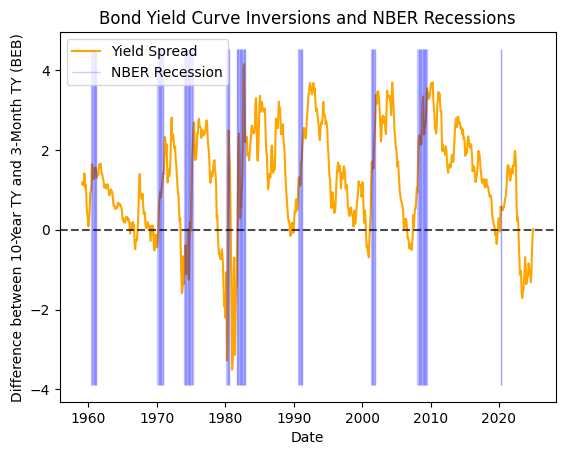

In [31]:
plt.plot(data["Date"], data["Spread"], linestyle='-', color='orange', label='Yield Spread')
ymin, ymax = plt.ylim()
plt.vlines(
    x=data["Date"][data["NBER_Rec"] == 1],  
    ymin=plt.ylim()[0],               
    ymax=plt.ylim()[1], 
    color='blue',
    linewidth=1,
    alpha=0.2,
    label='NBER Recession'
)
plt.axhline(0, linestyle='--', color='black', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Difference between 10-Year TY and 3-Month TY (BEB)')
plt.title('Bond Yield Curve Inversions and NBER Recessions')
plt.legend()